# 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import datetime

## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
# low_memory = False: lê todo o arquivo de uma vez para a memória
# df_raw: dataframe onde foi apenas feito a leitura e não houve limpeza dos dados
df_sales_raw = pd.read_csv('../data/train.csv', low_memory = False)
df_store_raw = pd.read_csv('../data/store.csv', low_memory = False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store')

In [3]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
814041,877,2,2013-07-02,7123,928,1,1,0,1,a,c,29190.0,NaN,NaN,0,NaN,NaN,NaN


# 1.0 DESCRICAO DOS DADOS E LIMPEZA DOS DADOS
- Quantidade de Dados:
    - Eu tenho os recursos corretos para trabalhar?
        - Servidores? Clusters? Spark? Hadoop?
- Tipos de Variáveis:
    - Quais os tipos de variáveis?
        - % Numéricas, % Categórica, % Temporal
- Quantidade de Dados Faltante:
    - Qual o volume de dados NA?
    - Qual a razão de faltar dados?
        - Sistema? Input manual?
- Resumo Geral dos Dados:
    - Estatística Descritiva

## 1.1 Reaname Columns

In [4]:
df1 = df_raw.copy()

In [5]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType',
            'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 
            'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

# snake_case: estilo de formatação de palavras onde deixa todas as letras minúsculas e separadas por underline
# função lambda: é uma forma de definir funções anônimas (funções sem nome), geralmente usadas para operações simples
# lambda x: inflection.underscore(x): recebe um nome de coluna x como entrada e usa a função inflection.underscore(x) para converter esse nome em formato snake_case
snakecase = lambda x: inflection.underscore(x)

# map(): aplica uma função a cada elemento de um iterável
# map(snakecase, cols_old): o map() é usado para aplicar a função snakecase a cada elemento da lista cols_old
cols_new = list(map(snakecase, cols_old))

# rename cols
df1.columns = cols_new

In [7]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimensions

In [8]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Columns: {df1.shape[1]}')

Number of Rows: 1017209
Number of Columns: 18


## 1.3 Data Types

In [9]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [10]:
df1['date'] = pd.to_datetime(df1['date'])

In [11]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [12]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [13]:
# máximo valor original da coluna competition distance
df1['competition_distance'].max()

75860.0

In [14]:
# competition_distance: distância em metros até a loja concorrente mais próxima
# suposição: os valores NA indicam que a loja em questão não possui competidor próximo
# alternativa: preencher os valores NA com números altos, maiores que o valor máximo da coluna, indicado que existe um competidor mas que ele está muito distante
# 200000 if math.isnan(df1['competition_distance']) else df1['competition_distance']
# lambda x: 200000 if math.isnan(x['competition_distance']) else x['competition_distance']
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)


# competition_open_since_month: fornece o mês aproximado da hora em que o concorrente mais próximo foi aberto
# suposição: parte dos valores NA é referente as lojas que não possuem um concorrente próximo e a outra parte foi por conta de não se saber a data de inauguração do concorrente mais próximo
# alternativa: repetir o mesmo valor de data da coluna date, apesar de não apresentar uma lógica de fato vai servir para o acompanhamento do desempenho da loja em competições
# df1['date'].month if math.isnan(df1['competition_open_since_month']) else df1['competition_open_since_month']
# lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month']
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)


# competition_open_since_year: fornece o ano aproximado da hora em que o concorrente mais próximo foi aberto     
# suposição: mesma do competition_open_since_month
# alternativa: mesma do competition_open_since_month
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)


# promo2_since_week: descreve a semana do calendário em que a loja começou a participar da Promo2
# suposição: os valores NA são das lojas que não participam da Promo2
# alternativa: mesma do competition_open_since_month
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis = 1)


# promo2_since_year: descreve o ano em que a loja começou a participar da Promo2
# suposição: mesma d promo2_since_year
# alternativa: mesma do competition_open_since_month       
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis = 1)


# promo_interval: descreve os intervalos consecutivos em que o Promo2 é iniciado, nomeando os meses em que a promoção é iniciada novamente
# alternativa: preencher os valores faltantes com 0 e criar uma nova coluna que indica se a loja está em promoção ou não comparando o mês da observação com os meses presentes no 'promo_interval'
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1['promo_interval'].fillna(0, inplace = True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
# 0 if df1['promo_interval'] == 0 else 1 if df1['month_map'] in df1['promo_interval'].split(',') else 0
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)

In [15]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [16]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
949492,298,6,2013-03-02,8342,739,1,0,0,0,d,a,19840.0,7.0,2009.0,0,9.0,2013.0,0,Mar,0


## 1.6 Change Types

In [17]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [18]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [19]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical
- Os principais objetivos da Estatística Descritiva são: ganhar conhecimento de negócio e detectar alguns erros da base
- As métricas da Estatística Descritiva são: Métricas de Dispersão (indicam o quão esparsos ou concentrado os dados estão em relação as Métricas de Tendência Central, como a variância, desvio padrão, min e máx) e Métricas de Tendência Central (resumem os dados em um único número, como a média e a mediana)
- Skew: Indica como é a deformação da distribuição em relação a normal, mais para direita Skew negativa e mais para esquerda Skew positiva
- Kurtosis: Trata da concentração dos dados, quanto maior o valor de Kurtosis positiva, indica que, mais dados concentrados, sendo graficamente representada por um pico alto, já uma Kurtosis negativa indica dados mais dispersos, sendo graficamente um pico menor
- A diferença entra a Média e Mediana indica o deslocamento da curva normal, representado pela Skew, quanto mais próxima de 0 mais próxima da normal
- Boxplot: Gráfico utilizado para atributos categóricos onde é apresentado tanto as Métricas de Dispersão quanto as Métrica de Tendência Central

In [20]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

In [21]:
num_attributes.sample()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
319884,350,5,0,0,0,1,0,8880.0,10,2014,1,14,2011,1


In [22]:
cat_attributes.sample()

,state_holiday,store_type,assortment,promo_interval,month_map
563945,0,a,c,0,Fev


### 1.7.1 Numerical Attributes

In [23]:
# Central Tendency: mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion: std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


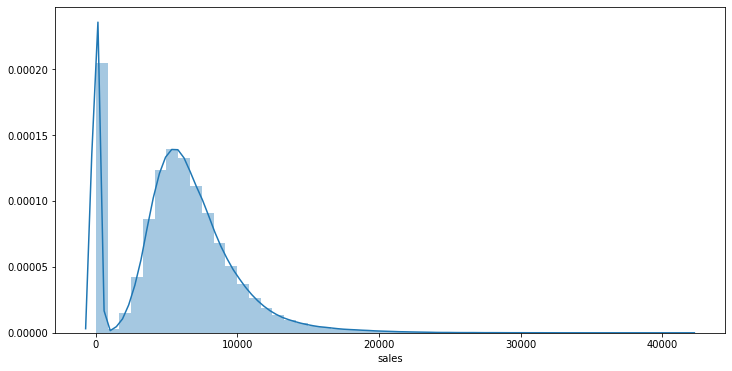

In [24]:
# distribuição: o gráfico se aproxima de uma distribuição normal porque a diferença entre a média e a mediana é baixa
# skew: como o valor da skew é positiva há um deslocamento do gráfico para esquerda
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(df1['sales'])

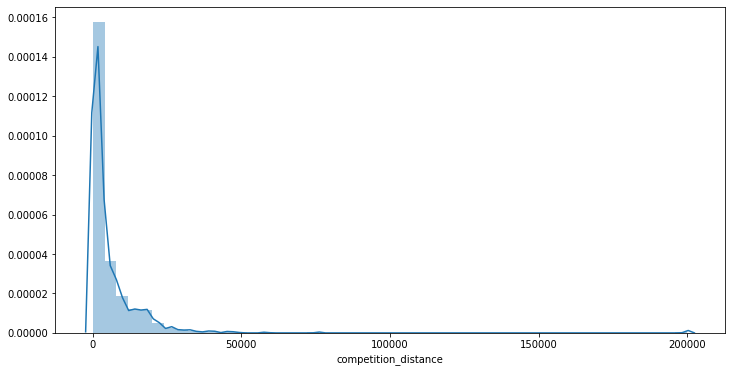

In [25]:
# distribuição: a distribuição é similar a distribuição de Poisson, que apresenta um pico bem alto no começo e depois vai caindo
# skew: o valor de skew muito alta e positiva faz o gráfico ficar super deslocado para a esquerda
# kurtosis: valor muito alto e positivo indicado que os dados estão superconcentrados e apresentando como um pico no gráfico
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [26]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

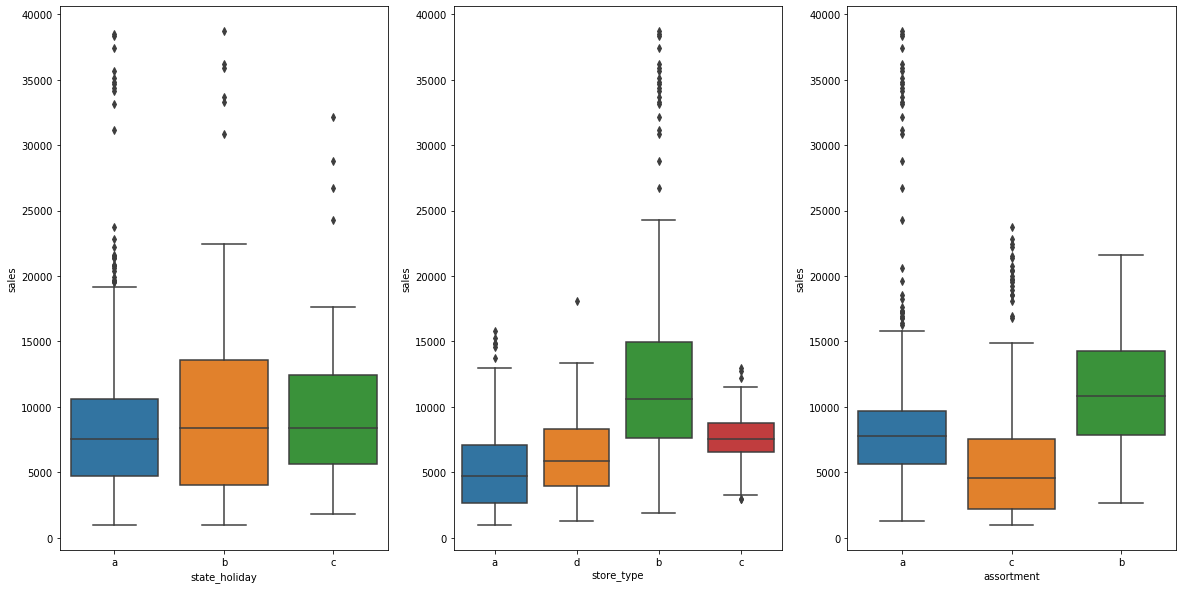

In [27]:
# retirando os dias onde não há feriado e os casos onde não houve vendas (que são os dias onde a loja estava fechada)
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

fig, ax = plt.subplots(figsize=(20, 10))

plt.subplot(1, 3, 1)
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'store_type', y = 'sales', data = aux)

plt.subplot(1, 3, 3)
sns.boxplot(x = 'assortment', y = 'sales', data = aux)

# 2.0 FEATURE ENGINEERING
- Motivação: Ter as variáveis disponíveis para estudo durante a Análise Exploratória de Dados
- Mapa Mental de Hipóteses: Ajuda no levantamento de hipóteses a serem avaliadas na Análise Exploratória dos Dados, o Mapa Mental de Hipóteses é um roteiro que indica quais variáveis são necessárias para fazer as análises que vão validar as hipóteses (VARIÁVEIS -> ANÁLISES -> HIPÓTESES)
    - Fenômeno: Qual fenômeno estou modelando? (Vendas, classificação de objetos em uma imagem, clusterização de clientes)
    - Agentes: Quem são os agentes que atuam sobre o fenômeno de interesse? (Clientes, lojas, produtos são agentes que impactam as vendas fazendo elas crescerem ou caírem de alguma forma)
    - Atributos dos Agentes: Qual a descrição dos Agentes? (Clientes - idade, escolaridade, estado civil, salário)
- Lista de Hipóteses: Gerada a partir do Mapa Mental de Hipóteses e que serão analizadas com Dados, cada Hipótese validada ou descartada gera um insight
- Hipóteses são apostas que não apresentam uma relação de causa e efeito e sim uma correlação, ou seja, elas apresentam agentes que influenciam o fenômeno, mas que não são os responsáveis em si por causar ele
    - AGENTE + APOSTA + ATRIBUTO + FENÔMENO + APOSTA
    - LOJAS de MAIOR PORTE deveriam VENDER MAIS
    - LOJAS com MAIOR SORTIMENTO deveriam VENDER MAIS
    - LOJAS com MAIS COMPETIDORES POR PERTO deveriam VENDER MENOS

In [28]:
df2 = df1.copy()

## 2.1 Mind Map Hypothesis

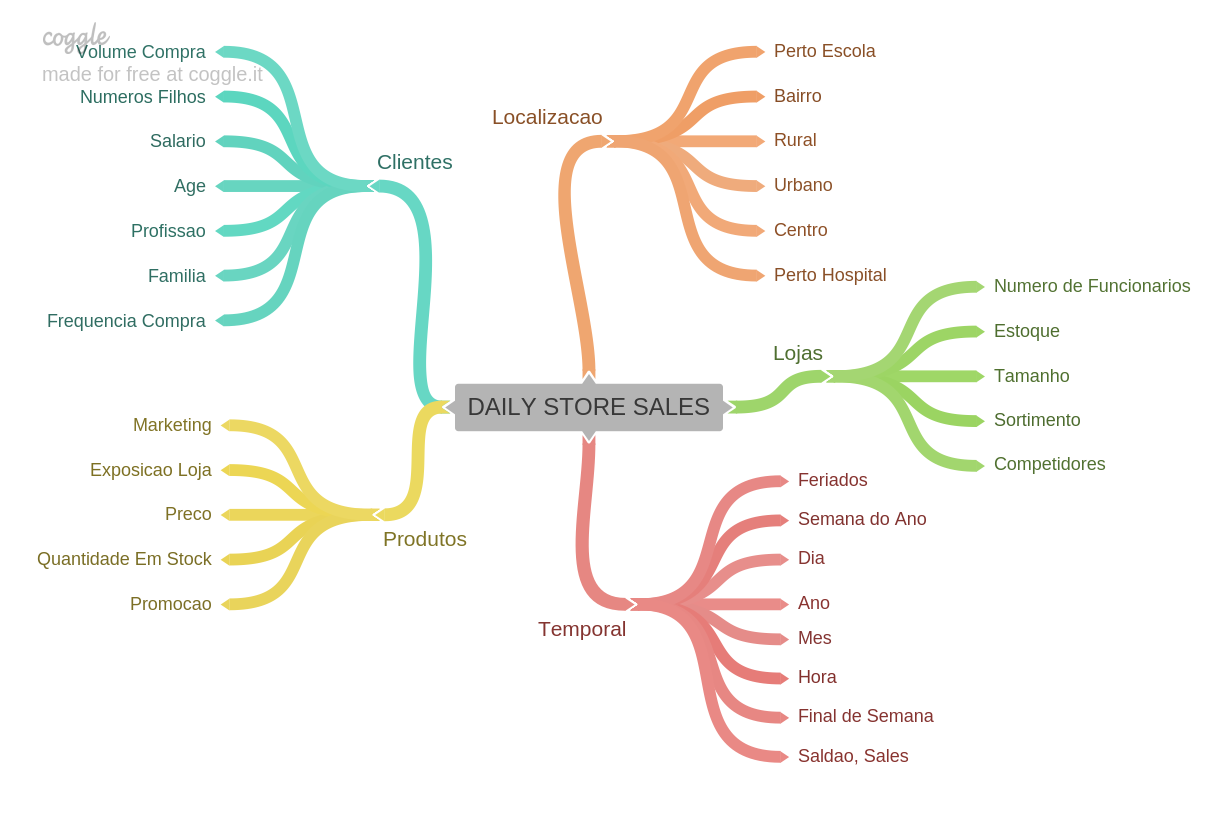

In [29]:
Image('../img/MindMapHypothesis.png')

## 2.2 Hypothesis Criation

### 2.2.1 Hypothesis Loja

**1.** Lojas com número maior de funcionários deveriam vender mais \
**2.** Lojas com maior capacidade de estoque deveriam vender mais \
**3.** Lojas com maior porte deveriam vender mais \
**4.** Lojas com maior sortimentos deveriam vender mais \
**5.** Lojas com competidores mais próximos deveriam vender menos \
**6.** Lojas com competidores à mais tempo deveriam vendem mais

### 2.2.2 Hypothesis Produto

**1.** Lojas que investem mais em Marketing deveriam vender mais \
**2.** Lojas com maior exposição de produto deveriam vender mais \
**3.** Lojas com produtos com preço menor deveriam vender mais \
**5.** Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais \
**6.** Lojas com promoções ativas por mais tempo deveriam vender mais \
**7.** Lojas com mais dias de promoção deveriam vender mais \
**8.** Lojas com mais promoções consecutivas deveriam vender mais

### 2.2.3 Hypothesis Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais \
**2.** Lojas deveriam vender mais ao longo dos anos \
**3.** Lojas deveriam vender mais no segundo semestre do ano \
**4.** Lojas deveriam vender mais depois do dia 10 de cada mês \
**5.** Lojas deveriam vender menos aos finais de semana \
**6.** Lojas deveriam vender menos durante os feriados escolares

## 2.3 Final Hypothesis List
- Disponibilidade dos dados: Validar as hipóteses, as quais os dados já estão disponíveis, no caso de uma baixa performance do modelo buscar os dados que viabilizam a validação de outras hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais \
**2.** Lojas com competidores mais próximos deveriam vender menos \
**3.** Lojas com competidores à mais tempo deveriam vendem mais 

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais \
**5.** Lojas com mais dias de promoção deveriam vender mais \
**6.** Lojas com mais promoções consecutivas deveriam vender mais

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais \
**8.** Lojas deveriam vender mais ao longo dos anos \
**9.** Lojas deveriam vender mais no segundo semestre do ano \
**10.** Lojas deveriam vender mais depois do dia 10 de cada mês \
**11.** Lojas deveriam vender menos aos finais de semana \
**12.** Lojas deveriam vender menos durante os feriados escolares

## 2.4 Feature Engineering

In [30]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis = 1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since']) / 7).apply(lambda x: x.days).astype(int)

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [31]:
df2.sample().T

,671385
store,941
day_of_week,4
date,2013-11-07 00:00:00
sales,4764
customers,566
open,1
promo,1
state_holiday,regular_day
school_holiday,0
store_type,a


# 3.0 FILTRAGEM DE VARIÁVEIS
- Filtragem de Variáveis: Restrições de acordo com o Negócio
- Seleção de Variáveis: Variáveis mais relevantes para o Modelo

In [32]:
df3 = df2.copy()

## 3.1 Filtragem das Linhas
- Perspectiva de Negócios:
    - open: As linhas onde o open é 0 não apresentam valor, pois indicam que a loja estava fechada, logo não houve vendas nesse dia
    - sales: Os dias onde a loja está fechada o sales é 0

In [34]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 Seleção das Colunas
- Perspectiva de Negócios:
    - customers: Não é possível saber quantos clientes vão estar na loja daqui a 6 semanas, para utilizar essa variável seria necessário fazer um modelo para prever esses valores primeiro
    - open: Depois de tirar as linhas que indicam a loja fechada, 0, só resta o valor 1, o que não agrega valor
    - promo_interval: Foi utilizada apenas para derivar a coluna promo_since
    - month_map: Coluna auxilar

In [35]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop(cols_drop, axis = 1)

In [36]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')